In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
data = pd.read_csv('houses_to_rent_v2.csv')
print(data.head())

           city  area  rooms  bathroom  parking spaces floor     animal  \
0     São Paulo    70      2         1               1     7      acept   
1     São Paulo   320      4         4               0    20      acept   
2  Porto Alegre    80      1         1               1     6      acept   
3  Porto Alegre    51      2         1               0     2      acept   
4     São Paulo    25      1         1               0     1  not acept   

       furniture  hoa (R$)  rent amount (R$)  property tax (R$)  \
0      furnished      2065              3300                211   
1  not furnished      1200              4960               1750   
2  not furnished      1000              2800                  0   
3  not furnished       270              1112                 22   
4  not furnished         0               800                 25   

   fire insurance (R$)  total (R$)  
0                   42        5618  
1                   63        7973  
2                   41        3841 

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB
None


In [ ]:
data = data.dropna()
data = pd.get_dummies(data, columns=['city', 'animal', 'furniture'], drop_first=True)

In [ ]:
data['floor'] = pd.to_numeric(data['floor'], errors='coerce')
data = data.dropna(subset=['floor'])

In [ ]:
X = data.drop('rent amount (R$)', axis=1)
y = data['rent amount (R$)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.252e+08, tolerance: 6.392e+06
  model = cd_fast.enet_coordinate_descent(


RMSE del modelo de regresión lineal: 8.92870040930211
RMSE del modelo de bosque aleatorio: 249.32946315777207
RMSE del modelo de regresión Lasso: 231.20972627786628
RMSE del modelo de regresión Ridge: 8.92881680437149
RMSE del modelo de Support Vector Regressor (SVR): 3880.1531049161945


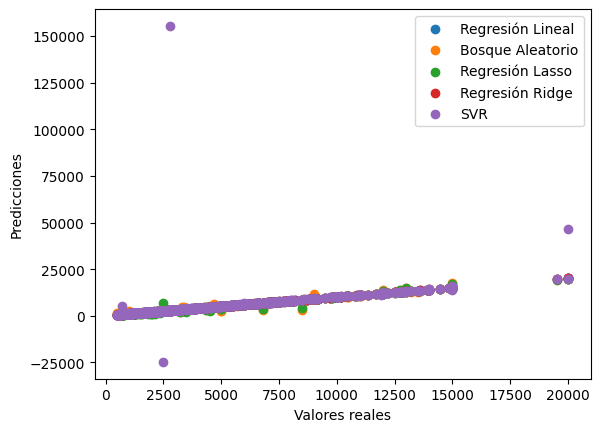

In [ ]:
# Modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Modelo de regresión Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Modelo de regresión Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Modelo de Support Vector Regressor (SVR)
svr_model = SVR(kernel='linear', C=1.0)
svr_model.fit(X_train, y_train)

# Modelo de bosque aleatorio
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)
svr_predictions = svr_model.predict(X_test)
svr_rmse = sqrt(mean_squared_error(y_test, svr_predictions))
ridge_rmse = sqrt(mean_squared_error(y_test, ridge_predictions))
lasso_rmse = sqrt(mean_squared_error(y_test, lasso_predictions))
lr_rmse = sqrt(mean_squared_error(y_test, lr_predictions))
rf_rmse = sqrt(mean_squared_error(y_test, rf_predictions))

print("RMSE del modelo de regresión lineal:", lr_rmse)
print("RMSE del modelo de bosque aleatorio:", rf_rmse)
print("RMSE del modelo de regresión Lasso:", lasso_rmse)
print("RMSE del modelo de regresión Ridge:", ridge_rmse)
print("RMSE del modelo de Support Vector Regressor (SVR):", svr_rmse)

plt.scatter(y_test, lr_predictions, label='Regresión Lineal')
plt.scatter(y_test, rf_predictions, label='Bosque Aleatorio')
plt.scatter(y_test, lasso_predictions, label='Regresión Lasso')
plt.scatter(y_test, ridge_predictions, label='Regresión Ridge')
plt.scatter(y_test, svr_predictions, label='SVR')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()